In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados = pd.read_csv('Dados\Dataset_train.csv')
dados.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
print('Existem nesse dataset %d linhas e %d colunas' %dados.shape)

Existem nesse dataset 54808 linhas e 14 colunas


In [4]:
# Verificando se existem dados nulos e o tipo de dado presente em cada coluna.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
# Realizando uma contagem dos dados nulos de cada coluna.
dados.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Podemos identificar que existem dados nulos nas colunas **Education** e **Previous_year_rating**, logo, será necessário realizar um tratamento inicial nestes dados.

In [6]:
# Removendo as linhas com dados faltantes
dados = dados.dropna()

#Resetando o index após a remoção das linhas 
dados.reset_index(inplace = True, drop = True)
dados

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
48656,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
48657,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
48658,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.2+ MB


As linhas com dados faltantes foram removidas, irei verificar se existem dados vazios em alguma das colunas.

In [8]:
dados['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [9]:
dados['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_32', 'region_6', 'region_33', 'region_8',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [10]:
dados['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [11]:
dados['gender'].unique()

array(['f', 'm'], dtype=object)

In [12]:
dados['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [13]:
dados['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6, 10,  8,  9], dtype=int64)

In [14]:
dados['age'].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 27, 29, 26, 57, 40,
       42, 23, 59, 44, 50, 56, 20, 25, 41, 47, 36, 46, 60, 43, 54, 24, 22,
       58, 48, 55, 51, 52, 53, 21], dtype=int64)

In [15]:
dados['previous_year_rating'].unique()

array([5., 3., 1., 4., 2.])

In [16]:
dados['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  3, 16,  9, 26, 12, 11, 17, 14, 13, 19,
       15, 23, 20, 18, 22, 25, 28,  1, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

In [17]:
dados['KPIs_met >80%'].unique()

array([1, 0], dtype=int64)

In [18]:
dados['awards_won?'].unique()

array([0, 1], dtype=int64)

In [19]:
dados['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 80, 84, 77, 51, 46, 75, 68, 79,
       72, 61, 58, 87, 47, 57, 52, 88, 71, 48, 65, 62, 53, 78, 44, 91, 82,
       69, 74, 86, 90, 92, 67, 89, 56, 76, 81, 70, 45, 55, 39, 94, 93, 64,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

In [20]:
# Renomendo o nome das colunas
dados.rename(columns = {'employee_id':'id_empregado', 'department':'departamento',
                        'region':'regiao', 'education':'grau_instrucao',
                        'gender':'genero', 'recruitment_channel':'canal_recrutamento',
                        'no_of_trainings':'qtd_treinamentos', 'age':'idade', 
                        'length_of_service':'tempo_de_servico',
                        'KPIs_met >80%':'KPIs_atingidos >80%', 'awards_won?':'premiado?',
                        'avg_training_score': 'pontuacao_media_treinamento','is_promoted':'promovido'}, inplace = True)
dados.head()

,id_empregado,departamento,regiao,grau_instrucao,genero,canal_recrutamento,qtd_treinamentos,idade,previous_year_rating,tempo_de_servico,KPIs_atingidos >80%,premiado?,pontuacao_media_treinamento,promovido
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [21]:
# Traduzindo as linhas
dados['departamento'] = dados['departamento'].replace({'Sales & Marketing':'Vendas_e_Marketing',
                                                       'Operations':'Operacoes',
                                                       'Technology':'TI',
                                                       'Analytics':'Analistas',
                                                       'R&D':'P&D', 
                                                       'Procurement':'Compras',
                                                       'Finance':'Financeiro', 
                                                       'HR':'RH', 
                                                       'Legal':'Jurídico'})


dados['grau_instrucao'] = dados['grau_instrucao'].replace({"Master's & above":'Mestrado_ou_Superior', 
                                                           "Bachelor's":'Bacharel', 
                                                           'Below Secondary':'Abaixo_Ensino_medio'})

dados['canal_recrutamento'] = dados['canal_recrutamento'].replace({'sourcing':'Anuncio',
                                                                   'other':'Outro',
                                                                   'referred':'Indicação'})

dados.head()

,id_empregado,departamento,regiao,grau_instrucao,genero,canal_recrutamento,qtd_treinamentos,idade,previous_year_rating,tempo_de_servico,KPIs_atingidos >80%,premiado?,pontuacao_media_treinamento,promovido
0,65438,Vendas_e_Marketing,region_7,Mestrado_ou_Superior,f,Anuncio,1,35,5.0,8,1,0,49,0
1,65141,Operacoes,region_22,Bacharel,m,Outro,1,30,5.0,4,0,0,60,0
2,7513,Vendas_e_Marketing,region_19,Bacharel,m,Anuncio,1,34,3.0,7,0,0,50,0
3,2542,Vendas_e_Marketing,region_23,Bacharel,m,Outro,2,39,1.0,10,0,0,50,0
4,48945,TI,region_26,Bacharel,m,Outro,1,45,3.0,2,0,0,73,0


# Balanceamento e encodilng dos dados

<AxesSubplot:title={'center':'Distribuição da variável target'}>

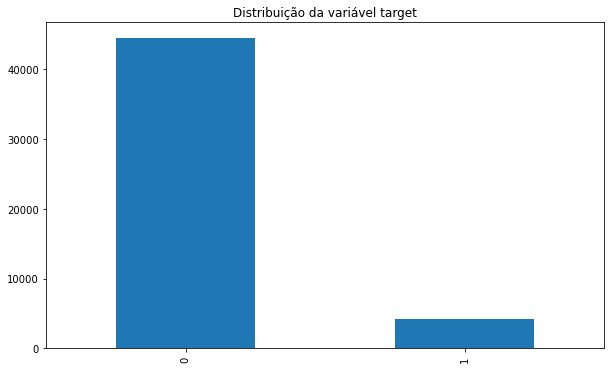

In [22]:
# Plotando a distribuição da variável target
dados_count = dados['promovido'].value_counts()
ax = dados_count.plot.bar()
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição da variável target')
ax

In [23]:
# Quantidade de registros para cada classe
dados_count

0    44428
1     4232
Name: promovido, dtype: int64

> A variável target **promovido** possui um grande desbalanceamento entre as suas classes. 

Como é possível identificar na imagem acima, existem cerca de 10 vezes mais registros de pessoas que não deveriam ser promovidas.

Por isso, uma das medidas que precisam ser adotadas é o **balancemento** das variáveis, para que o modelo apresente um bom desempenho de classificação de ambas. O balanceamento pode ser realizado atravez de um **UnderSampling**, que iguala as variáveis removendo o "excesso" da variável que possui a maior quantidade de registros, ou de um **OverSampling**, que cria novos registros da variável minoritária até que ambas tenham a mesma quantidade de registros.

In [24]:
#Iniciando o processo de encoldingo doa dados

dados['genero'] = dados['genero'].replace({'f':0, 'm':1})
dados['canal_recrutamento'] = dados['canal_recrutamento'].replace({'Anuncio':0,'Indicação':1, 'Outro':2})
dados['grau_instrucao'] = dados['grau_instrucao'].replace({'Bacharel':0,'Mestrado_ou_Superior':1,'Abaixo_Ensino_medio':2})

dados['regiao'] = dados['regiao'].replace({'region_7':7, 'region_22':22, 'region_19':19,
                                           'region_23':23, 'region_26':26, 'region_2':2,
                                           'region_20':20, 'region_34':34, 'region_1':1, 
                                           'region_4':4, 'region_29':29, 'region_31':31,
                                           'region_15':15, 'region_14':14, 'region_11':11,
                                           'region_5':5, 'region_28':28, 'region_17':17,
                                           'region_13':13, 'region_16':16, 'region_25':25,
                                           'region_10':10, 'region_27':27, 'region_30':30,
                                           'region_12':12, 'region_21':21, 'region_32':32,
                                           'region_6':6, 'region_33':33, 'region_8':8, 
                                           'region_24':24, 'region_3':3, 'region_9':9, 
                                           'region_18':18})

# Aplicando o Onehotencolding para a variável departamento

dados = pd.get_dummies(data = dados, columns = ['departamento'])
dados.head()


,id_empregado,regiao,grau_instrucao,genero,canal_recrutamento,qtd_treinamentos,idade,previous_year_rating,tempo_de_servico,KPIs_atingidos >80%,...,promovido,departamento_Analistas,departamento_Compras,departamento_Financeiro,departamento_Jurídico,departamento_Operacoes,departamento_P&D,departamento_RH,departamento_TI,departamento_Vendas_e_Marketing
0,65438,7,1,0,0,1,35,5.0,8,1,...,0,0,0,0,0,0,0,0,0,1
1,65141,22,0,1,2,1,30,5.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,19,0,1,0,1,34,3.0,7,0,...,0,0,0,0,0,0,0,0,0,1
3,2542,23,0,1,2,2,39,1.0,10,0,...,0,0,0,0,0,0,0,0,0,1
4,48945,26,0,1,2,1,45,3.0,2,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#Removendo a coluna id_empregado
dados = dados.drop(columns = 'id_empregado', axis = 1)

In [26]:
# Separando as variáveis entre X e y para aplicação do modelo
X = dados.drop(columns = 'promovido', axis = 1)
y = dados['promovido']

# Aplicando o Oversampling

In [27]:
from imblearn.over_sampling import SMOTE

# Instanciando uma variável com um objeto SMOTE
smt = SMOTE()

#Balanceando as variáveis
X,y = smt.fit_resample(X,y)

# Verificando a nova distribuição
y.value_counts()

0    44428
1    44428
Name: promovido, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
# Definindo uma SEED
SEED = 7
np.random.seed(SEED)

# Separadno os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)


In [29]:
# Definindo a função que irá rodar os modelos, realizar a predição e devolver as métricas

from sklearn import metrics

def modelo(classificador):
    SEED = 7
    np.random.seed(SEED)
    modelo = classificador
    modelo.fit(X_train, y_train)
    return modelo

def predicao(modelo):
    y_pred = modelo.predict(X_test)
    return y_pred

def metricas(y_test, y_pred):
    acuracia = metrics.accuracy_score(y_test, y_pred)*100
    precisao = metrics.precision_score(y_test, y_pred)*100
    recall = metrics.recall_score(y_test, y_pred)*100
    f1 = metrics.f1_score(y_test, y_pred)*100
    
    print('A acurácia do modelo foi de %.2f%%' %acuracia)
    print('A precisão do modelo foi de %.2f%%'%precisao)
    print('A taxa de recall do modelo foi de %.2f%%'% recall)
    print('A taxa de balanceamento do modelo foi de %.2f%%'%f1)
    
    mc = metrics.confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = mc)
    disp.plot()


A acurácia do modelo foi de 65.17%
A precisão do modelo foi de 59.33%
A taxa de recall do modelo foi de 95.01%
A taxa de balanceamento do modelo foi de 73.04%


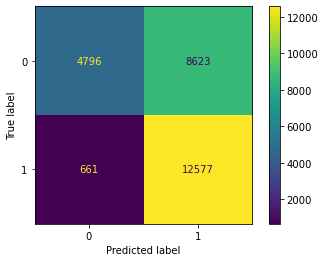

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = modelo(GaussianNB())
previsoes = predicao(gnb)
metricas(y_test, previsoes)

A acurácia do modelo foi de 80.68%
A precisão do modelo foi de 77.75%
A taxa de recall do modelo foi de 85.60%
A taxa de balanceamento do modelo foi de 81.49%


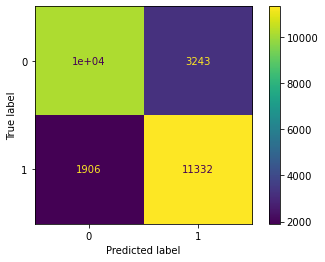

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = modelo(RandomForestClassifier(max_depth = 5, random_state = SEED))
previsoes = predicao(rfc)
metricas(y_test, previsoes)